In [1]:
import os 
os.chdir("C:\\Users\\KRISH8\\Desktop\\TGB- Assignment") # making working directory

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
genome_df = pd.read_csv('problem1_rsids.csv') # i am giving name "genome_df" for our firt problem data.

In [41]:
genome_df.head(10) # checking if data is imported correctly

,Annotation,Chr,Position,Genotypes
0,rs121434297,1,11855218,AA|0.4581
1,rs387907088,12,65722364,TT|0.4953
2,rs121434561,19,48624501,GG|0.4929
3,rs1109867,2,220083453,TG|0.7395
4,rs2231164,4,89015857,TT|0.8277
5,rs58818712,4,89018678,AA|0.4902
6,rs4148157,4,89020934,GG|0.3278
7,rs2622628,4,89029252,CC|0.5077
8,rs12505410,4,89030841,TG|0.3882
9,rs13120400,4,89033527,TT|0.8639


In [168]:
genome_df.shape

(2972, 8)

In [38]:
genome_df.info() # this code cheaks data type of variables and no.of rows and columns, 
# and even size of data also.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
Annotation    3000 non-null object
Chr           3000 non-null object
Position      3000 non-null int64
Genotypes     3000 non-null object
dtypes: int64(1), object(3)
memory usage: 93.8+ KB


In [39]:
genome_df.isnull().sum() # checking null values in every column

Annotation    0
Chr           0
Position      0
Genotypes     0
dtype: int64

In [43]:
genome_df.columns # this code returns only column names.
# checking column names because in presence of spaces in names then coding wii becomes defficult.

Index(['Annotation', 'Chr', 'Position', 'Genotypes'], dtype='object')

In [45]:
genome_df.nunique() # checking unique values in each column

Annotation    1524
Chr             26
Position      1527
Genotypes     2091
dtype: int64

## Aim 1 : Remove calls represented as "--"

#### Before removing the rows having "--" we need to split the variable "genotype" into "AA" & "0.4581" 

In [56]:
gen_type_call = list(genome_df.Genotypes.str.split(pat='|')) # splitting 'Genotype',
# converting to list type and assigning to a variable name "gen_type_call"

In [57]:
gen_type_call  # after splitting the list looks like this

[['AA', '0.4581'],
 ['TT', '0.4953'],
 ['GG', '0.4929'],
 ['TG', '0.7395'],
 ['TT', '0.8277'],
 ['AA', '0.4902'],
 ['GG', '0.3278'],
 ['CC', '0.5077'],
 ['TG', '0.3882'],
 ['TT', '0.8639'],
 ['CC', '0.5093'],
 ['GG', '0.4663'],
 ['TC', '0.5081'],
 ['GG', '0.2354'],
 ['CC', '0.335'],
 ['GG', '0.4365'],
 ['GG', '0.4775'],
 ['AA', '0.3209'],
 ['AG', '0.4475'],
 ['CG', '0.3568'],
 ['TC', '0.3521'],
 ['CC', '0.5054'],
 ['AG', '0.9141'],
 ['TC', '0.2967'],
 ['TC', '0.3012'],
 ['CC', '0.5018'],
 ['TA', '0.3539'],
 ['CC', '0.1748'],
 ['AA', '0.886'],
 ['CC', '0.6987'],
 ['TT', '0.3853'],
 ['TT', '0.5154'],
 ['CC', '0.5039'],
 ['TC', '0.3643'],
 ['TT', '0.6738'],
 ['CC', '0.7718'],
 ['AA', '0.5195'],
 ['TT', '0.3892'],
 ['TC', '0.3335'],
 ['CC', '0.518'],
 ['AT', '0.3961'],
 ['TC', '0.8632'],
 ['GG', '0.689'],
 ['AG', '0.3872'],
 ['AA', '0.2062'],
 ['CC', '0.4142'],
 ['TG', '0.4034'],
 ['AG', '0.3506'],
 ['GG', '0.6686'],
 ['TT', '0.9003'],
 ['TT', '0.2037'],
 ['CC', '0.5097'],
 ['AA', '0.7614'

In [58]:
t_1 =[]
t_2 =[]
for i in gen_type_call:
    t_1.append(i[0])
    t_2.append(i[1])
# this code grabs each genome "AA","GC".... and call score "0.458","0.4953".....and
# inserts in to empty list t_1 and t_2.
 

In [59]:
genome_df['genotype'] =t_1
genome_df['call_score'] =t_2  # from above lists t_1 and t_2 we are creating two new columns in 
# orginal dataframe "genome" contains "AA","CG".... and "call_score" contains "0.458","0.4953".....

In [60]:
genome_df.head(10) # checking if split is done correctly

,Annotation,Chr,Position,Genotypes,genotype,call_score
0,rs121434297,1,11855218,AA|0.4581,AA,0.4581
1,rs387907088,12,65722364,TT|0.4953,TT,0.4953
2,rs121434561,19,48624501,GG|0.4929,GG,0.4929
3,rs1109867,2,220083453,TG|0.7395,TG,0.7395
4,rs2231164,4,89015857,TT|0.8277,TT,0.8277
5,rs58818712,4,89018678,AA|0.4902,AA,0.4902
6,rs4148157,4,89020934,GG|0.3278,GG,0.3278
7,rs2622628,4,89029252,CC|0.5077,CC,0.5077
8,rs12505410,4,89030841,TG|0.3882,TG,0.3882
9,rs13120400,4,89033527,TT|0.8639,TT,0.8639


#### As we can see above splittig is done succesfully.  

In [61]:
genome_df.drop('Genotypes',axis=1,inplace=True)  
# now we dont want "Genotype" variable. so, we are droping it

In [62]:
genome_df.head() # checking data after droping "Genotype"

,Annotation,Chr,Position,genotype,call_score
0,rs121434297,1,11855218,AA,0.4581
1,rs387907088,12,65722364,TT,0.4953
2,rs121434561,19,48624501,GG,0.4929
3,rs1109867,2,220083453,TG,0.7395
4,rs2231164,4,89015857,TT,0.8277


In [63]:
genome_df[genome_df['genotype']=='--'] ,len(genome_df[genome_df['genotype']=='--']) 
# this code returns the rows having "--" in variable calls, and there count

(       Annotation Chr   Position genotype call_score
 78      rs1412239   9   28425515       --          0
 257     rs2228001   3   14187449       --          0
 388     rs8176746   9  136131322       --          0
 419     rs1288097  15   45141373       --          0
 463     rs4390051   9   66483231       --          0
 471    rs61816025   1  142794416       --          0
 478    rs75422217  21    9854532       --          0
 601     rs1288097  15   45141373       --          0
 638     rs2228001   3   14187449       --          0
 1457  rs202080221  12  111856571       --          0
 1926    rs4794245  17   49461290       --          0
 2140     rs653765  15   59042012       --          0
 2700    rs2739330  22   24295286       --          0
 2705   rs34311235   2  142767433       --          0
 2710  rs374470794  17   78086425       --          0
 2721   rs61757294   8  143994266       --          0
 2730    rs7255045  19   12932269       --          0
 2740    rs9607782  22   415

##### There are 28 records having "--" 

In [64]:
genome_df = genome_df[genome_df['genotype']!='--'] # this code drops records having "--".

In [65]:
genome_df.call_score = genome_df['call_score'].astype('float64') # after splitting, calling score 
# is in string format 
# but we want it to be in float, this code converts string to float format. 

# Aim 2 : keep observations with high call score 

In [67]:
high_call_score = genome_df[genome_df['call_score'] >= 0.80].sort_values('call_score',ascending=False) 
# This code gives you call score which are above 0.80 in descending order
high_call_score

,Annotation,Chr,Position,genotype,call_score
73,rs11648796,16,792190,AG,0.9750
910,rs1133642,15,31267147,CC,0.9634
204,rs2272991,6,29527599,TT,0.9609
142,rs6591147,11,105912984,TT,0.9531
2804,rs538656,18,57850422,CC,0.9492
652,rs2512276,11,124115370,GG,0.9460
578,rs11210726,1,43299121,AA,0.9452
489,rs11210726,1,43299121,AA,0.9441
1069,rs12531711,7,128617466,AA,0.9436
2660,rs952718,2,215888624,CC,0.9408


# Aim 3 unique values in "rsIDs".

In [68]:
genome_df['Annotation'].value_counts() # this code returns how many times each rsIDs is duplicated

rs587781525    4
rs121908751    4
rs4244285      4
rs121913123    4
rs12248560     4
rs56253082     4
rs81002874     4
rs79341977     3
rs121913250    3
rs397508465    3
rs12720459     3
rs9923231      3
rs794726827    3
rs774857058    3
rs387907280    3
rs267607957    3
rs754921704    3
rs72551322     3
rs150372078    3
rs121908527    3
rs34504522     3
rs28941770     3
rs1135824      3
rs587781558    3
rs2276305      3
rs41293513     3
rs62638191     3
rs199472926    3
rs12233719     3
rs4129008      3
              ..
rs544015279    1
rs1293265      1
rs149460734    1
rs11576522     1
rs148487630    1
rs686631       1
rs55906048     1
rs571687759    1
rs556539598    1
rs577315876    1
rs566696367    1
rs571024965    1
rs582717       1
rs563733637    1
rs75422217     1
rs746078222    1
rs866748674    1
rs77155824     1
rs577266494    1
rs753850608    1
rs200087488    1
rs535722308    1
rs2274566      1
rs28371626     1
rs758070716    1
rs4390051      1
rs551261055    1
rs573946207   

In [69]:
t_r = pd.DataFrame(genome_df['Annotation'].value_counts()) # this code given how many times 
# each value is duplicated in 'Annotation', then converting into dataframe.  

In [70]:
t_r.reset_index(inplace=True) # from the above code, after creating dataframe the 'Annotation'
# variable becomes index of that dataframe, for merging the orginal data to data we created above 
# the column names need to be same. so, this code converts the index to column and assigns default
# index values to dataframe.

In [71]:
t_r.columns = ['Annotation','times_duplicated'] # after reseting index, i am changing colun names for 
# our convenience and for merging data's.

In [72]:
genome_df = genome_df.merge(t_r,on=['Annotation']) 
# this code merges the two dataframes by variable 'Annotation'

In [75]:
genome_df.head(10) # checking if merging is done correctly.

,Annotation,Chr,Position,genotype,call_score,times_duplicated
0,rs121434297,1,11855218,AA,0.4581,3
1,rs121434297,1,11855218,TT,0.4279,3
2,rs121434297,1,11855218,AA,0.4581,3
3,rs387907088,12,65722364,TT,0.4953,2
4,rs387907088,12,65722364,TT,0.4620,2
5,rs121434561,19,48624501,GG,0.4929,2
6,rs121434561,19,48624501,CC,0.5024,2
7,rs1109867,2,220083453,TG,0.7395,2
8,rs1109867,2,220083453,TG,0.7370,2
9,rs2231164,4,89015857,TT,0.8277,2


In [77]:
unique_rs = genome_df[genome_df['times_duplicated']==1]
unique_rs

,Annotation,Chr,Position,genotype,call_score,times_duplicated
55,rs1412239,9,28425515,CC,0.1748,1
763,rs4390051,9,66483231,GG,0.2277,1
778,rs61816025,1,142794416,AA,0.4685,1
787,rs75422217,21,9854532,TT,0.5100,1
906,rs8176746,9,136131322,AC,0.3976,1
1546,rs202080221,12,111856571,GG,0.4308,1
1988,rs4794245,17,49461290,CC,0.5172,1
2186,rs653765,15,59042012,CC,0.9151,1
2775,rs7097397,10,50025396,AG,0.5085,1
2794,rs9320913,6,98584733,CC,0.2471,1


In [78]:
genome_df.shape

(2972, 6)

In [79]:
unique_rs['Chr'].unique() 

array(['9', '1', '21', '12', '17', '15', '10', '6', '22'], dtype=object)

#### out of 2972 records 175 are unique rsIDs. (5.88%) 

# Aim 4 : Relation between duplicate rsIDs.

In [82]:
duplicates_df = genome_df[genome_df['times_duplicated']!=1]
duplicate_2 = genome_df[genome_df['times_duplicated']==2]
duplicate_3 = genome_df[genome_df['times_duplicated']==3]
duplicate_4 = genome_df[genome_df['times_duplicated']==4]

In [83]:
duplicates_df

,Annotation,Chr,Position,genotype,call_score,times_duplicated
0,rs121434297,1,11855218,AA,0.4581,3
1,rs121434297,1,11855218,TT,0.4279,3
2,rs121434297,1,11855218,AA,0.4581,3
3,rs387907088,12,65722364,TT,0.4953,2
4,rs387907088,12,65722364,TT,0.4620,2
5,rs121434561,19,48624501,GG,0.4929,2
6,rs121434561,19,48624501,CC,0.5024,2
7,rs1109867,2,220083453,TG,0.7395,2
8,rs1109867,2,220083453,TG,0.7370,2
9,rs2231164,4,89015857,TT,0.8277,2


In [169]:
print(duplicate_2.shape)
print(duplicate_3.shape)
print(duplicate_4.shape)

(2460, 6)
(309, 6)
(28, 6)


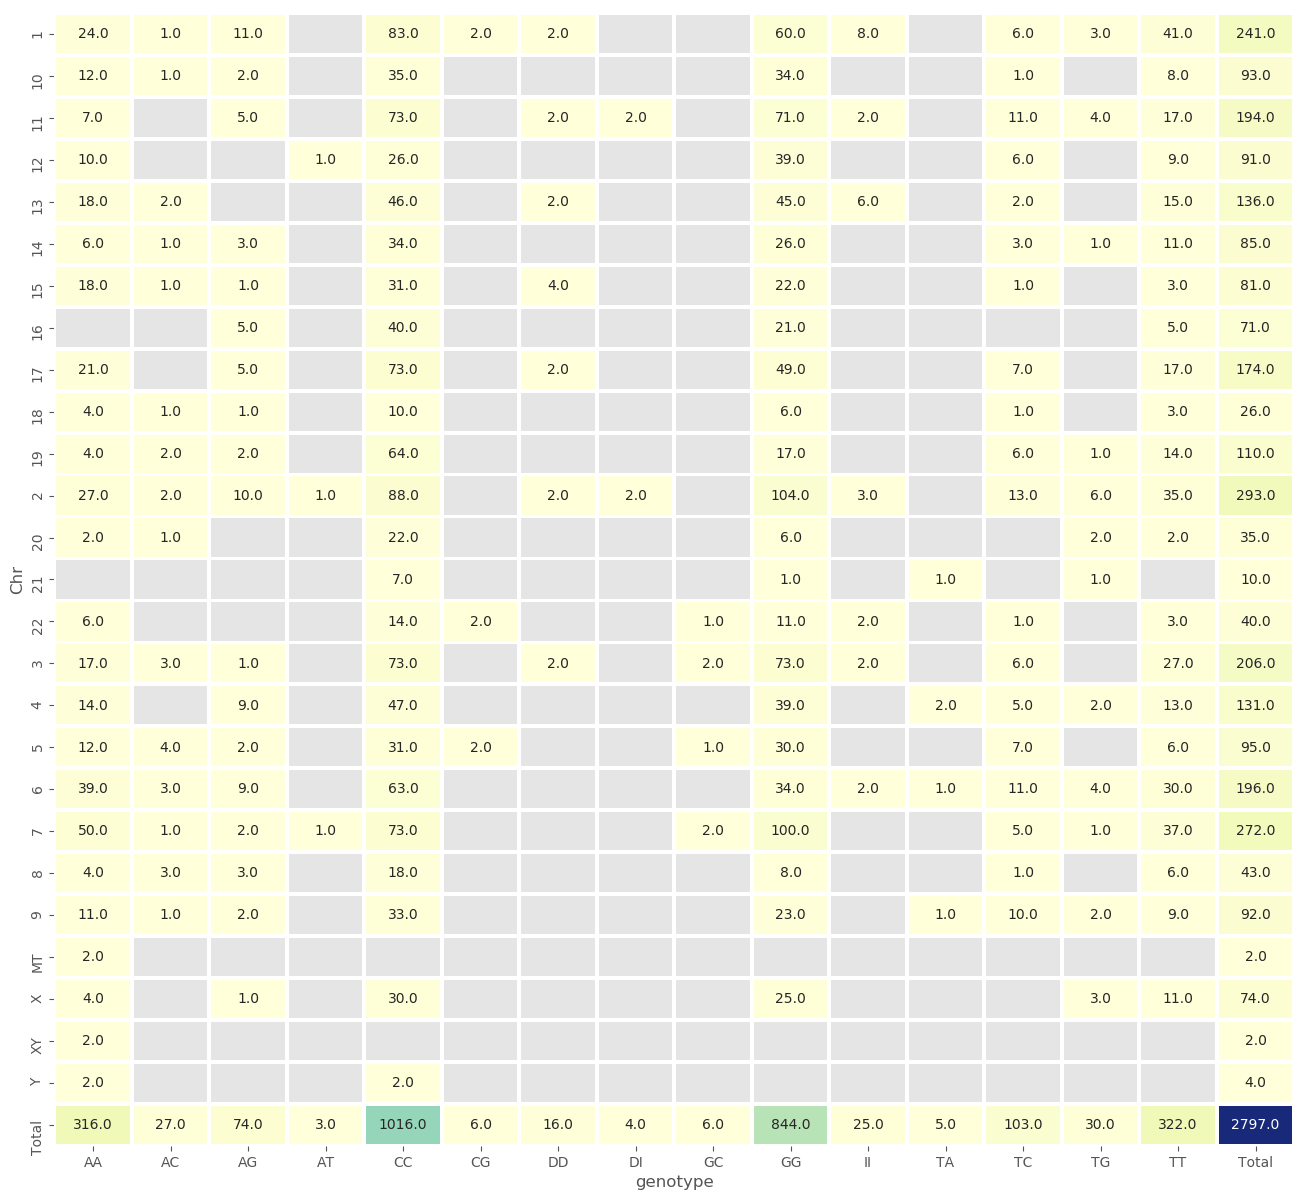

In [176]:
chr_genotype = pd.crosstab(duplicates_df.Chr,duplicates_df.genotype,values=duplicates_df.Annotation,
                    aggfunc='count',margins=True,margins_name='Total')
plt.style.use('ggplot')
fig = plt.figure(figsize=(16,15),dpi=100)

heatmap =sns.heatmap(chr_genotype,annot=True,linewidths=2,vmax=3000,cmap='YlGnBu',vmin=1,fmt='.1f',cbar=False)
plt.show(heatmap)
fig.savefig('cross_tab_Chr_genotype')  # this code plots cross tabe for chromosomes and genotype

In [121]:
genome_df['Chr'].unique() # checking unique chromosomes

array(['1', '12', '19', '2', '4', '14', '11', '16', '9', 'X', '22', '6',
       '20', '7', '3', '18', '8', '5', '17', '15', '13', '10', 'Y', 'MT',
       '21', 'XY'], dtype=object)

In [122]:
# here i found there are abnormal chromosomes for X & Y, i am going to add a new column stating 
# there are missing chromosomes in 'Chr' variable by giving 'o' normal , '1' for missing 'X'
# '2' for missing 'Y'.

In [123]:
def abnormal_chr(x):
    if (x=='Y'):
        return(1)
    elif (x=='X'):
        return(2)
    else:
        return(0)

In [124]:
genome_df['Abnormal_Chr'] = genome_df['Chr'].apply(abnormal_chr) 

In [129]:
genome_df

,Annotation,Chr,Position,genotype,call_score,times_duplicated,Abnormal_Chr
0,rs121434297,1,11855218,AA,0.4581,3,0
1,rs121434297,1,11855218,TT,0.4279,3,0
2,rs121434297,1,11855218,AA,0.4581,3,0
3,rs387907088,12,65722364,TT,0.4953,2,0
4,rs387907088,12,65722364,TT,0.4620,2,0
5,rs121434561,19,48624501,GG,0.4929,2,0
6,rs121434561,19,48624501,CC,0.5024,2,0
7,rs1109867,2,220083453,TG,0.7395,2,0
8,rs1109867,2,220083453,TG,0.7370,2,0
9,rs2231164,4,89015857,TT,0.8277,2,0


In [130]:
genome_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2972 entries, 0 to 2971
Data columns (total 7 columns):
Annotation          2972 non-null object
Chr                 2972 non-null object
Position            2972 non-null int64
genotype            2972 non-null object
call_score          2972 non-null float64
times_duplicated    2972 non-null int64
Abnormal_Chr        2972 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 185.8+ KB


In [131]:
genome_df['genotype'].unique()  # checking unique genome types

array(['AA', 'TT', 'GG', 'CC', 'TG', 'TC', 'AG', 'CG', 'TA', 'AT', 'AC',
       'DD', 'II', 'GC', 'DI'], dtype=object)

In [133]:
def abnormal_genome(x):
    if (x=='AA')or(x=='TT')or(x=='GG')or(x=='CC')or(x=='CG')or(x=='TA')or(x=='AT')or(x=='GC'):
        return(0)
    else:                     # function returns '0' as normal genotype and '1' as abnormal genotype.
        return(1)                          

In [139]:
genome_df['Abnormal_genotype'] = genome_df['genotype'].apply(abnormal_genome)

In [142]:
genome_df[genome_df['Abnormal_genotype']==1] # showing abnormal genotype data

,Annotation,Chr,Position,genotype,call_score,times_duplicated,Abnormal_Chr,Abnormal_genotype
7,rs1109867,2,220083453,TG,0.7395,2,0,1
8,rs1109867,2,220083453,TG,0.7370,2,0,1
17,rs12505410,4,89030841,TG,0.3882,2,0,1
18,rs12505410,4,89030841,TG,0.4121,2,0,1
25,rs3109823,4,89064602,TC,0.5081,2,0,1
37,rs11216230,11,116884789,AG,0.4475,2,0,1
38,rs11216230,11,116884789,AG,0.4523,2,0,1
41,rs113681054,12,21402979,TC,0.3521,2,0,1
42,rs113681054,12,21402979,TC,0.3349,2,0,1
45,rs11648796,16,792190,AG,0.9141,2,0,1


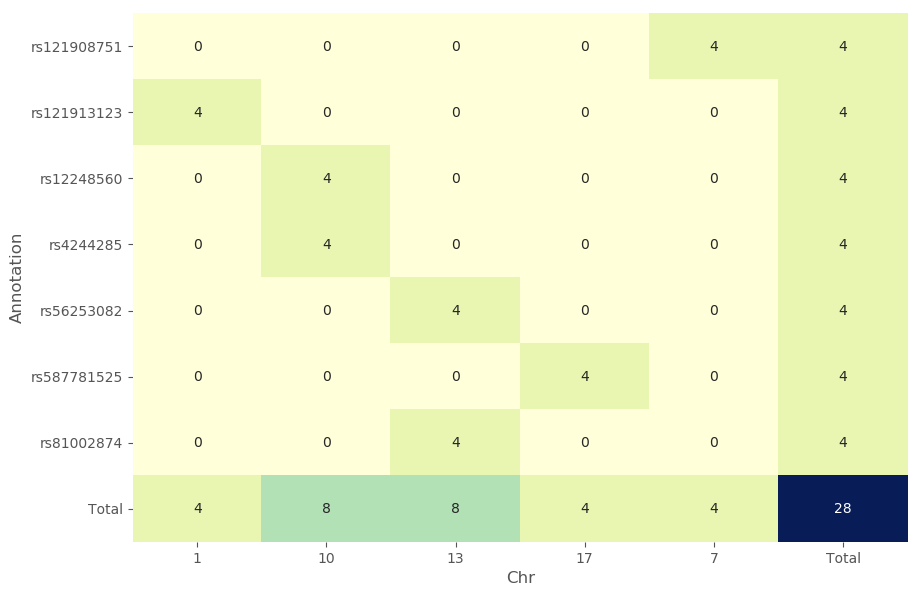

In [170]:
fig = plt.figure(figsize=(10,7),dpi=100)

sns.heatmap(pd.crosstab(duplicate_4.Annotation,duplicate_4.Chr,margins=True,margins_name='Total'),cmap="YlGnBu", annot=True, cbar=False)
plt.show()
fig.savefig('duplicate_4_rs_Chr')

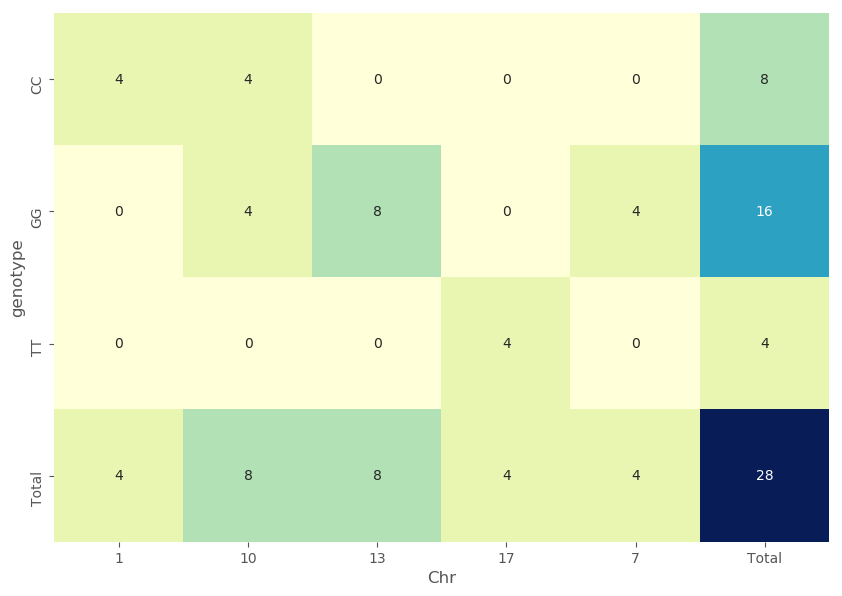

In [171]:
fig = plt.figure(figsize=(10,7),dpi=100)
sns.heatmap(pd.crosstab(duplicate_4.genotype,duplicate_4.Chr,margins=True,margins_name='Total'),cmap="YlGnBu", annot=True, cbar=False)
plt.show()  
fig.savefig('duplicate_4_genotype_Chr')

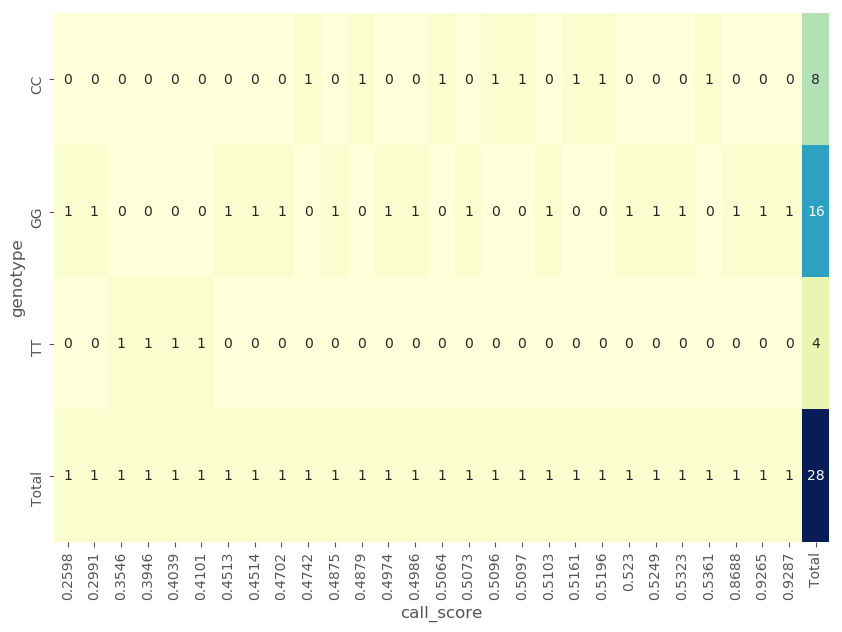

In [172]:
fig = plt.figure(figsize=(10,7),dpi=100)
sns.heatmap(pd.crosstab(duplicate_4.genotype,duplicate_4.call_score,margins=True,margins_name='Total'),cmap="YlGnBu", annot=True, cbar=False)
plt.show() 
fig.savefig('duplicate_4_genotype_callscore')

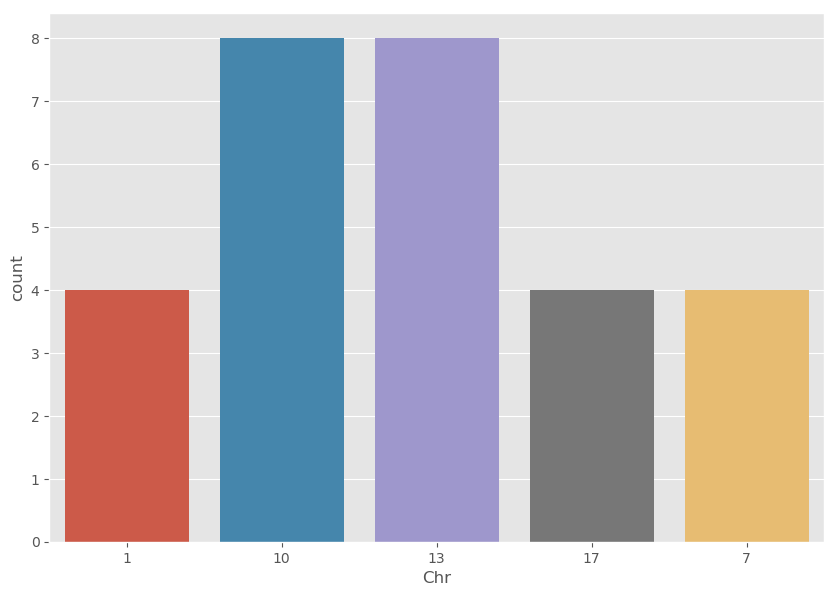

In [173]:
fig = plt.figure(figsize=(10,7),dpi=100)
sns.countplot(duplicate_4.Chr)
plt.show()
fig.savefig('duplicated_4_chromosomes')

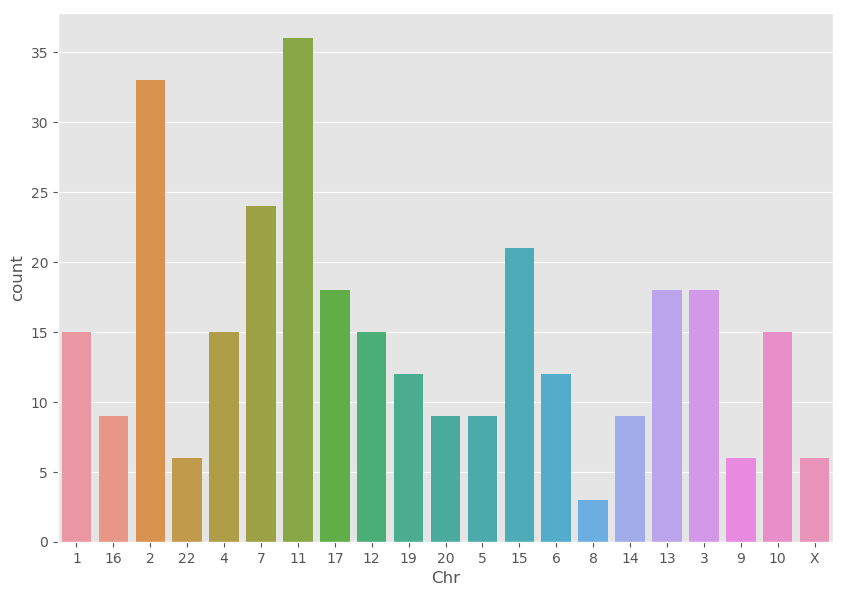

In [174]:
fig = plt.figure(figsize=(10,7),dpi=100)
sns.countplot(duplicate_3.Chr)
plt.show()
fig.savefig('duplicated_3_chromosomes')

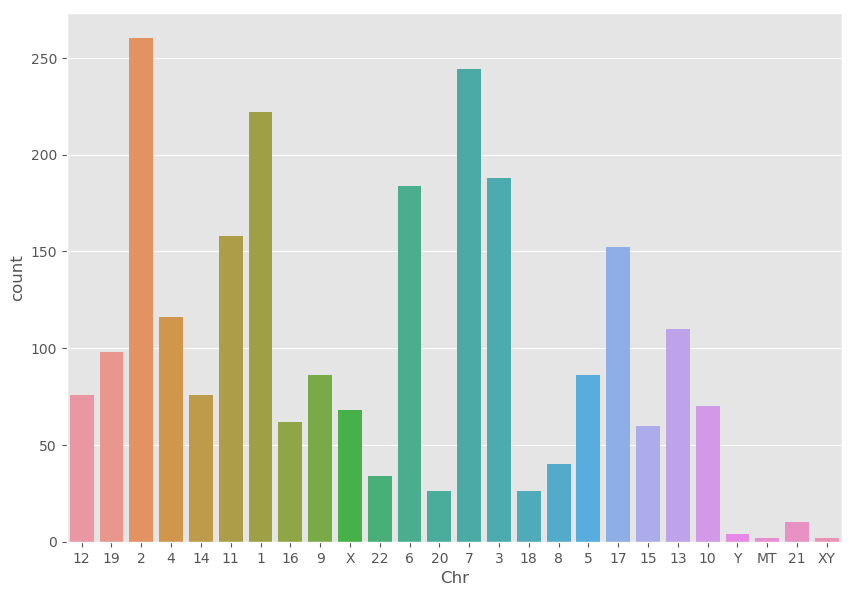

In [175]:
fig = plt.figure(figsize=(10,7),dpi=100)
sns.countplot(duplicate_2.Chr)
plt.show()
fig.savefig('duplicated_2_chromosomes.png')

In [178]:
# saving final dataframe
genome_df.to_excel('problem_1_final_data.xlsx')